## __1. The perceptron:__
<font size=3>
    
The [perceptron](https://en.wikipedia.org/wiki/Perceptron) is an analog signal-processing model developed in the 1940s. It later became the most basic mathematical model of a neuron, whose function
\begin{equation}
    f(\vec a) = 
    \begin{bmatrix}
        1,\; \vec w \cdot \vec a + b > 0\\
        0,\; \vec w \cdot \vec a + b \leq 0
     \end{bmatrix} \, ,
\end{equation}
receives a input signal $\vec a$, the _weight_ vector $\vec w$ scale the signal, and the _bias_ $b$ adjusts to a binary response $[0,\,1]$.  

The artificial neuron, $a_1 = \vec w \cdot \vec a_0 + b$, can be illustrated as a graph:
<center>
<img src="../figs/perceptron.png" width="250"/>
</center>

---

To improve the robustness of our linear model, let's consider an output signal $\vec a$ instead of a binary classification,
$$
    a_1^i = W_1^{ij}\, a_0^j + b_1^i \, .
$$
such that we have a _weight_ matrix $W_1^{ij}$ and the _bias_ vector $b_1^i$. The indexes $(i,\,j) = [1,2,3,\dots]$ range for the _output_ $\vec a_1$ and _input_ $\vec a_0$ sizes, respectively.
<center>
<img src="../figs/net1.png" width="250"/>
</center>


## __2. Multilayer Perceptron:__
<font size=3>

Those vertical groups of neurons are called _layers_. To deepen our neural network (NN) by adding layers between input and output, we have to redefine our perceptron function. Since a linear transformation of a linear function results in another linear function, so we cannot create layer connections such as $a^i_0 \rightarrow a^j_1 \rightarrow a^k_2$. 

__Proof:__

\begin{align}
   l_1:\quad a_1^i &= W_1^{ij}\,a_0^j + b_1^i \, ,\\
   l_2:\quad a_2^k &= W_2^{ki}\,a_1^i + b_2^k \\
                   &= W_2^{ki}\,\left(W_1^{ij}\,a_0^j+b_1^i\right) + b_2^k \\
                   &= \left(W_2^{ki}W_1^{ij}\right)a_0^j + \left(W_1^{ki}\,b_1^i+b_2^k\right) \\
                   &= {\Omega}^{kj}\,a_0^j+{\beta}^k \, ,
\end{align}

As a solution, we will break the function's linearity inspired by the [action potential](https://en.wikipedia.org/wiki/Action_potential) of [synapses](https://en.wikipedia.org/wiki/Synapse). The linear perceptron will now become the argument of a non-linear __activation function__ $\sigma_l$. For simplicity, we will consider all neurons from the layer $l$ having the same activation function, but each layer may have its own function. The __Multilayer Perceptron__ (MLP) model can be written as

$$
    a_l^i = \sigma_l\left(W_l^{ij}a_{l-1}^j + b_l^i\right) \, .
$$

<center>
<img src="../figs/net2.png" width="350"/>
</center>

Some terminologies related to the illustration above include MLP, __neural network__ (NN), and __dense layers__ (because they are densely connected). Those layers between the input and output are called __hidden layers__ since they are "unknown" before NN modeling.

## __3. The activation function:__
<font size=3>
    
A simple [activation function](https://en.wikipedia.org/wiki/Activation_function) can be thought as the [Heaviside step function](https://en.wikipedia.org/wiki/Heaviside_step_function) $[f(x) = 1,\, x \geq 0;\; 0,\, x < 0]$ to model when a neuron fires up, however, it's still a linear function. As an alternative, we may consider a closer form, the _sigmoid_ function, $f(x) = 1/(1+e^{-x})$. The choice of activation functions will depend on the modeling and the type of task to be solved.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

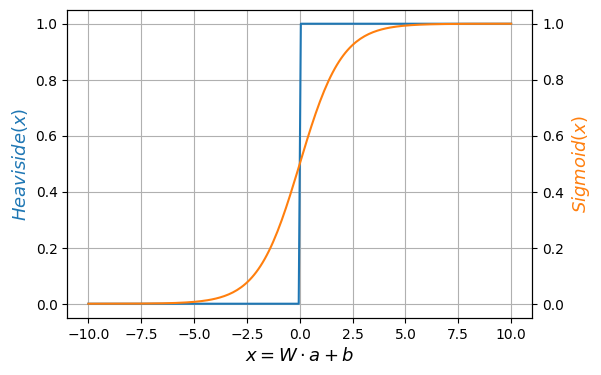

In [2]:
x = np.linspace(-10, 10, 200)

H = np.heaviside(x, 0.0)

σ = 1/(1 + np.exp(-x))


fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()

ax1.plot(x, H, c='#1f77b4')
ax2.plot(x, σ, c='#ff7f0e')

ax1.set_xlabel(r'$x = W\cdot a + b$', fontsize=13)
ax1.set_ylabel(r'$Heaviside(x)$', c='#1f77b4', fontsize=13)
ax2.set_ylabel(r'$Sigmoid(x)$', c='#ff7f0e', fontsize=13)

ax1.grid()
plt.show()

## __4. Loss function:__

<font size=3>
A question arises: What are the internal parameters (weights and bias) that enable the NN to make accurate predictions?

At first, weights and bias are set at random (normally using the [Xavier initialization](https://paperswithcode.com/method/xavier-initialization)), then while the data passes through the NN, weights and bias are updated for optimizing the __loss function__ (this is the __gradient descent__ mechanism). Considering a supervised model, a possible loss function choice can be the __mean squared error__,
$$
    \mathcal L(y,\, \bar y) = \left<(y - \bar y)^2\right> \, .
$$

When the entire dataset passes through the NN, and the parameters are optimized slightly, we count __one epoch__. To keep the parameter optimization improving, we train the NN for many epochs. For how many epochs, then? Until the optimization starts to saturate or worsen. This point of _learning validation_ and the _gradient descent mechanism_ will be studied later. Now, we have a lot of information to digest.